In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
machine_data=pd.read_csv("data.csv")

In [ ]:
machine_data.head(5)

,footfall,tempMode,AQ,USS,CS,VOC,RP,IP,Temperature,fail
0,0,7,7,1,6,6,36,3,1,1
1,190,1,3,3,5,1,20,4,1,0
2,31,7,2,2,6,1,24,6,1,0
3,83,4,3,4,5,1,28,6,1,0
4,640,7,5,6,4,0,68,6,1,0


# EDA

In [ ]:
machine_data.describe()

,footfall,tempMode,AQ,USS,CS,VOC,RP,IP,Temperature,fail
count,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000
mean,306.381356,3.727754,4.325212,2.939619,5.394068,2.842161,47.043432,4.565678,16.331568,0.416314
std,1082.606745,2.677235,1.438436,1.383725,1.269349,2.273337,16.423130,1.599287,5.974781,0.493208
min,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,19.000000,1.000000,1.000000,0.000000
25%,1.000000,1.000000,3.000000,2.000000,5.000000,1.000000,34.000000,3.000000,14.000000,0.000000
50%,22.000000,3.000000,4.000000,3.000000,6.000000,2.000000,44.000000,4.000000,17.000000,0.000000
75%,110.000000,7.000000,6.000000,4.000000,6.000000,5.000000,58.000000,6.000000,21.000000,1.000000
max,7300.000000,7.000000,7.000000,7.000000,7.000000,6.000000,91.000000,7.000000,24.000000,1.000000


In [ ]:
machine_data['Temperature'].value_counts()

Temperature
21    103
20    100
16     70
24     68
15     68
17     62
22     53
19     51
18     48
23     47
14     39
12     35
13     26
11     23
4      19
1      19
5      18
8      17
3      17
10     15
6      13
2      12
7      11
9      10
Name: count, dtype: int64

In [ ]:
machine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 944 entries, 0 to 943
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   footfall     944 non-null    int64
 1   tempMode     944 non-null    int64
 2   AQ           944 non-null    int64
 3   USS          944 non-null    int64
 4   CS           944 non-null    int64
 5   VOC          944 non-null    int64
 6   RP           944 non-null    int64
 7   IP           944 non-null    int64
 8   Temperature  944 non-null    int64
 9   fail         944 non-null    int64
dtypes: int64(10)
memory usage: 73.9 KB


<Axes: >

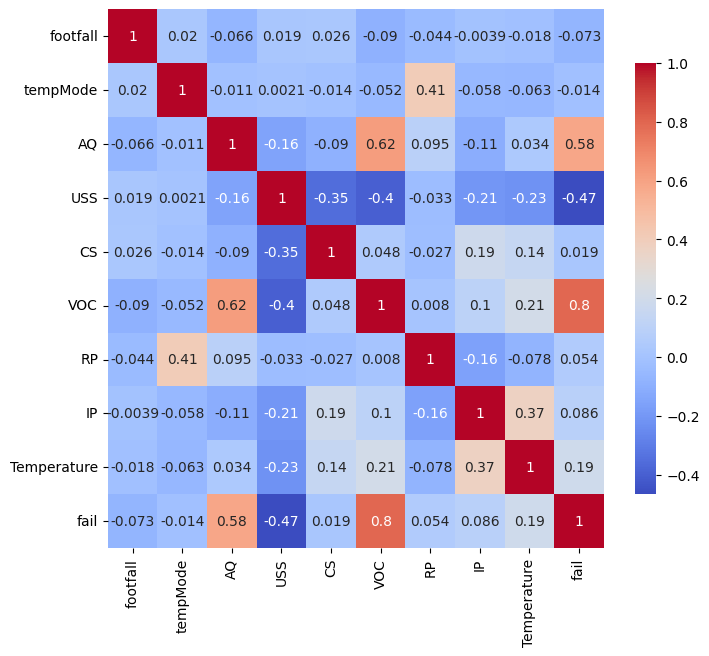

In [ ]:
plt.figure(figsize=(8,7))
sns.heatmap(machine_data.corr(),cmap='coolwarm', annot=True,cbar_kws={"shrink": .8})

## Note: Machine failure mostly depends on VOC,AQ,USS

In [ ]:
machine_data.isnull().sum()

footfall       0
tempMode       0
AQ             0
USS            0
CS             0
VOC            0
RP             0
IP             0
Temperature    0
fail           0
dtype: int64

In [ ]:
print(machine_data.duplicated().sum())
duplicate_rows = machine_data[machine_data.duplicated(keep=False)]
print(duplicate_rows)

1
     footfall  tempMode  AQ  USS  CS  VOC  RP  IP  Temperature  fail
730        31         5   3    3   6    1  48   6           21     0
766        31         5   3    3   6    1  48   6           21     0


In [ ]:
machine_data_1=machine_data.drop_duplicates()
print(machine_data_1.duplicated().sum())

0


Text(0.5, 1.0, 'Box Plot of Temperature by Target')

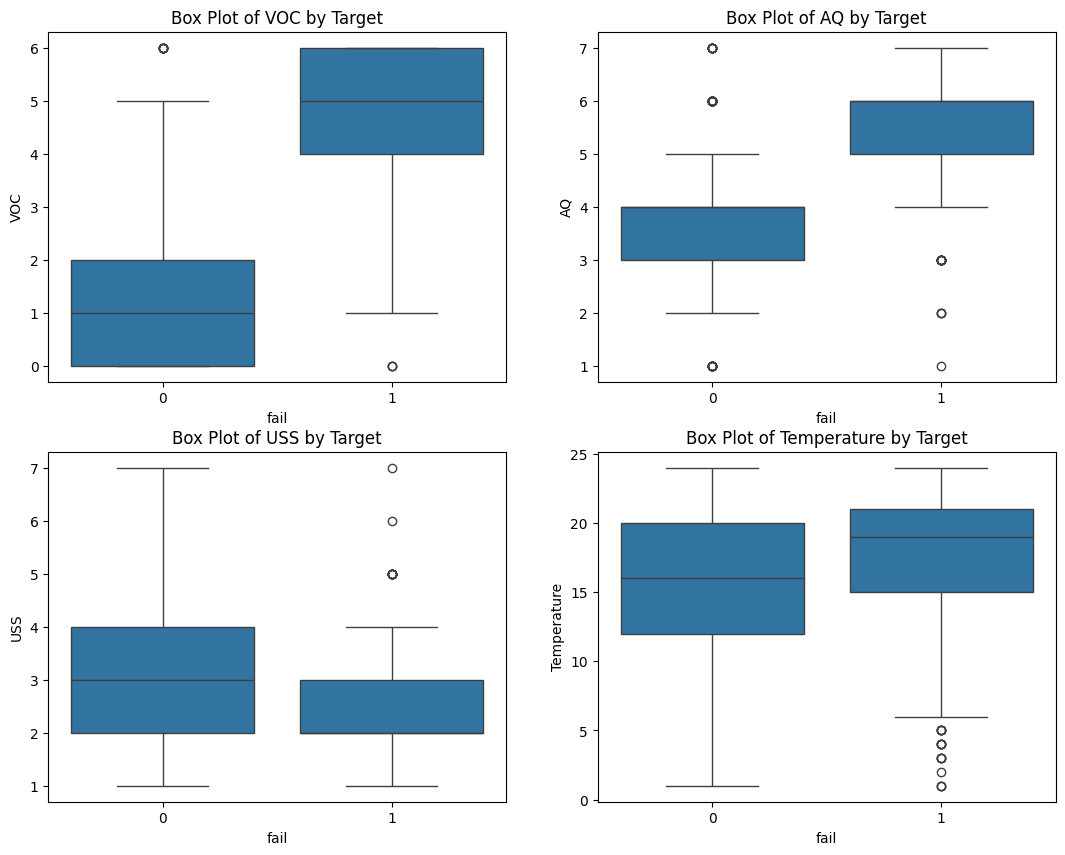

In [ ]:
plt.figure(figsize=(13,10))
plt.subplot(2,2,1)
sns.boxplot(x='fail', y='VOC', data=machine_data)
plt.title('Box Plot of VOC by Target')
plt.subplot(2,2,2)
sns.boxplot(x='fail', y='AQ', data=machine_data)
plt.title('Box Plot of AQ by Target')
plt.subplot(2,2,3)
sns.boxplot(x='fail', y='USS', data=machine_data)
plt.title('Box Plot of USS by Target')
plt.subplot(2,2,4)
sns.boxplot(x='fail', y='Temperature', data=machine_data)
plt.title('Box Plot of Temperature by Target')

In [ ]:
# Calculate IQR
Q1 = machine_data_1['VOC'].quantile(0.25)
Q3 = machine_data_1['VOC'].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
outliers_iqr = machine_data_1[(machine_data_1['VOC'] < (Q1 - 1.5 * IQR)) | (machine_data_1['VOC'] > (Q3 + 1.5 * IQR))]
print("Outliers using IQR:")
print(outliers_iqr)


Outliers using IQR:
Empty DataFrame
Columns: [footfall, tempMode, AQ, USS, CS, VOC, RP, IP, Temperature, fail]
Index: []


# Data

In [ ]:
from sklearn.model_selection import train_test_split
X=machine_data_1.iloc[:,:-1].values
y=machine_data_1.iloc[:,-1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
from sklearn.model_selection import GridSearchCV

# Decision Tree Model

In [ ]:


param_grid = {
    'max_depth': [None, 3, 6, 9],
    'min_samples_leaf': [1,5,10],
    'criterion': ['entropy','gini']
}
grid_search = GridSearchCV(DT_1, param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print(best_params)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score
DT_1 = DecisionTreeClassifier(max_depth=3,min_samples_leaf=1,criterion='entropy')
DT_1.fit(X_train, y_train)
y_pred = DT_1.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
confusion_mtx=confusion_matrix(y_test, y_pred)
recall_scr=recall_score(y_test, y_pred)
print("accuracy score: {} and recall_score: {}".format(accuracy,recall_scr))
print("confusion_matrix:")
print(confusion_mtx)


accuracy score: 0.8941798941798942 and recall_score: 0.9213483146067416
confusion_matrix:
[[87 13]
 [ 7 82]]


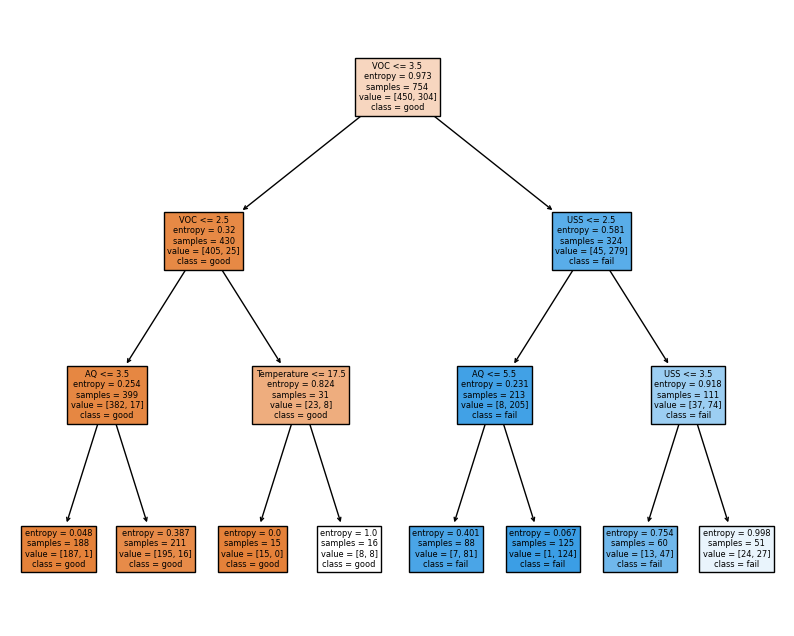

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
feature_names = machine_data_1.iloc[:,:-1].columns.tolist()
class_names = ['good','fail']
plt.figure(figsize=(10, 8))
plot_tree(DT_1, filled=True, feature_names=feature_names, class_names=class_names)
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
cv_scores = cross_val_score(DT_1, X, y, cv=5, scoring='accuracy')
print("Cross-validation scores:", cv_scores)
print("Mean accuracy:", np.mean(cv_scores))

Cross-validation scores: [0.85714286 0.93650794 0.89417989 0.87765957 0.85106383]
Mean accuracy: 0.8833108184172014


In [ ]:
from sklearn.model_selection import cross_val_score, KFold
cv_scores = cross_val_score(DT_1, X, y, cv=5, scoring='recall')
print("Cross-validation scores:", cv_scores)
print("Mean accuracy:", np.mean(cv_scores))

Cross-validation scores: [0.89873418 0.88607595 0.86075949 0.8974359  0.97435897]
Mean accuracy: 0.9034728984096072


# Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,recall_score

In [ ]:
import warnings
warnings.filterwarnings('ignore')
RF_1 = RandomForestClassifier(random_state=2)

param_grid = {
    'n_estimators': [5, 10, 15],
    'max_depth': [None, 3,6,9],
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],    # Minimum samples required to be at a leaf node
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

grid_search = GridSearchCV(estimator=RF_1, param_grid=param_grid,
                           cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

print("Best Parameters found: ", grid_search.best_params_)
print("Best Accuracy found: ", grid_search.best_score_)



Best Parameters found:  {'bootstrap': True, 'max_depth': 9, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 10}
Best Accuracy found:  0.9137924944812361


In [ ]:
RF_2 = RandomForestClassifier(random_state=3,n_estimators=10,max_depth=9,min_samples_split=5,
                              min_samples_leaf=2,max_features='auto',bootstrap=True)

RF_2.fit(X_train, y_train)
y_pred = RF_2.predict(X_test)

print("Accuracy on test set: ", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy on test set:  0.91005291005291
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.91      0.91       100
           1       0.90      0.91      0.91        89

    accuracy                           0.91       189
   macro avg       0.91      0.91      0.91       189
weighted avg       0.91      0.91      0.91       189

Confusion Matrix:
[[91  9]
 [ 8 81]]


In [ ]:
from sklearn.model_selection import cross_val_score, KFold
cv_scores = cross_val_score(RF_2, X, y, cv=5, scoring='accuracy')
print("Cross-validation scores:", cv_scores)
print("Mean accuracy:", np.mean(cv_scores))

Cross-validation scores: [0.88359788 0.92592593 0.8994709  0.88829787 0.90957447]
Mean accuracy: 0.901373409884048


In [ ]:
from sklearn.model_selection import cross_val_score, KFold
cv_scores = cross_val_score(RF_2, X, y, cv=5, scoring='recall')
print("Cross-validation scores :", cv_scores)
print("Mean accuracy:", np.mean(cv_scores))

Cross-validation scores: [0.74683544 0.88607595 0.87341772 0.85897436 0.94871795]
Mean accuracy: 0.8628042843232716


# Logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression

LG_1 = LogisticRegression(max_iter=1000, random_state=42)
LG_1.fit(X_train, y_train)
y_pred = LG_1.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.8888888888888888
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.88      0.89       100
           1       0.87      0.90      0.88        89

    accuracy                           0.89       189
   macro avg       0.89      0.89      0.89       189
weighted avg       0.89      0.89      0.89       189

Confusion Matrix:
[[88 12]
 [ 9 80]]


In [ ]:
from sklearn.model_selection import cross_val_score, KFold
cv_scores = cross_val_score(LG_1, X, y, cv=5, scoring='accuracy')
print("Cross-validation scores :", cv_scores)
print("Mean accuracy:", np.mean(cv_scores))

Cross-validation scores : [0.8994709  0.91534392 0.91005291 0.89893617 0.87765957]
Mean accuracy: 0.9002926939097151


In [ ]:
from sklearn.model_selection import cross_val_score, KFold
cv_scores = cross_val_score(LG_1, X, y, cv=5, scoring='recall')
print("Cross-validation scores :", cv_scores)
print("Mean accuracy:", np.mean(cv_scores))

Cross-validation scores : [0.81012658 0.88607595 0.89873418 0.91025641 0.96153846]
Mean accuracy: 0.8933463161311263


# LDA

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
LDA_1 = LinearDiscriminantAnalysis()
LDA_1.fit(X_train, y_train)
y_pred = LDA_1.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9047619047619048
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.88      0.91       100
           1       0.87      0.93      0.90        89

    accuracy                           0.90       189
   macro avg       0.90      0.91      0.90       189
weighted avg       0.91      0.90      0.90       189

Confusion Matrix:
[[88 12]
 [ 6 83]]


In [ ]:
from sklearn.model_selection import cross_val_score, KFold
cv_scores = cross_val_score(LDA_1, X, y, cv=5, scoring='recall')
print("Cross-validation scores :", cv_scores)
print("Mean accuracy:", np.mean(cv_scores))

Cross-validation scores : [0.91139241 0.89873418 0.92405063 0.91025641 0.97435897]
Mean accuracy: 0.9237585199610516


In [ ]:
from sklearn.model_selection import cross_val_score, KFold
cv_scores = cross_val_score(LDA_1, X, y, cv=5, scoring='accuracy')
print("Cross-validation scores :", cv_scores)
print("Mean accuracy:", np.mean(cv_scores))

Cross-validation scores : [0.93121693 0.92592593 0.92592593 0.88297872 0.89361702]
Mean accuracy: 0.9119329055499268


# Logistic+LDA

In [ ]:

LDA_2 = LinearDiscriminantAnalysis()
X_train_lda = LDA_2.fit_transform(X_train, y_train)
X_test_lda = LDA_2.transform(X_test)

LG_2 = LogisticRegression(max_iter=1000, random_state=42)
LG_2.fit(X_train_lda, y_train)
y_pred = LG_2.predict(X_test_lda)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.9047619047619048
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.89      0.91       100
           1       0.88      0.92      0.90        89

    accuracy                           0.90       189
   macro avg       0.90      0.91      0.90       189
weighted avg       0.91      0.90      0.90       189

Confusion Matrix:
[[89 11]
 [ 7 82]]


In [ ]:
from sklearn.model_selection import cross_val_score, KFold
cv_scores = cross_val_score(LG_2, X, y, cv=5, scoring='accuracy')
print("Cross-validation scores :", cv_scores)
print("Mean accuracy:", np.mean(cv_scores))

Cross-validation scores : [0.8994709  0.91534392 0.91005291 0.89893617 0.87765957]
Mean accuracy: 0.9002926939097151


In [ ]:
from sklearn.model_selection import cross_val_score, KFold
cv_scores = cross_val_score(LG_2, X, y, cv=5, scoring='recall')
print("Cross-validation scores :", cv_scores)
print("Mean accuracy:", np.mean(cv_scores))

Cross-validation scores : [0.81012658 0.88607595 0.89873418 0.91025641 0.96153846]
Mean accuracy: 0.8933463161311263
